# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
# import all the required libraries

import pickle
import numpy as np
import random
import matplotlib.pyplot as plt
import cv2
import cv2
import scipy.ndimage
import tensorflow as tf
from sklearn.utils import shuffle


training_file = 'train.p'
validation_file='valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

print("Training size x {}".format(len(X_train)))
print("Test size x {}".format(len(X_test)))
print("Image shape {}".format(X_train[0].shape))
print("Classes {}".format(len(set(y_train))))


Training size x 34799
Test size x 12630
Image shape (32, 32, 3)
Classes 43


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**


### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

# TODO : Read the number of images per each sign
inputs_per_class = np.bincount(y_train)

#TODO: calculate the max number of images in given traffic signs
max_inputs = np.max(inputs_per_class)

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of unique classes =", n_classes)
print("number of training samples per class =", inputs_per_class)
print("Max Number of training samples in a class =", max_inputs)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of unique classes = 43
number of training samples per class = [ 180 1980 2010 1260 1770 1650  360 1290 1260 1320 1800 1170 1890 1920  690
  540  360  990 1080  180  300  270  330  450  240 1350  540  210  480  240
  390  690  210  599  360 1080  330  180 1860  270  300  210  210]
Max Number of training samples in a class = 2010


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.


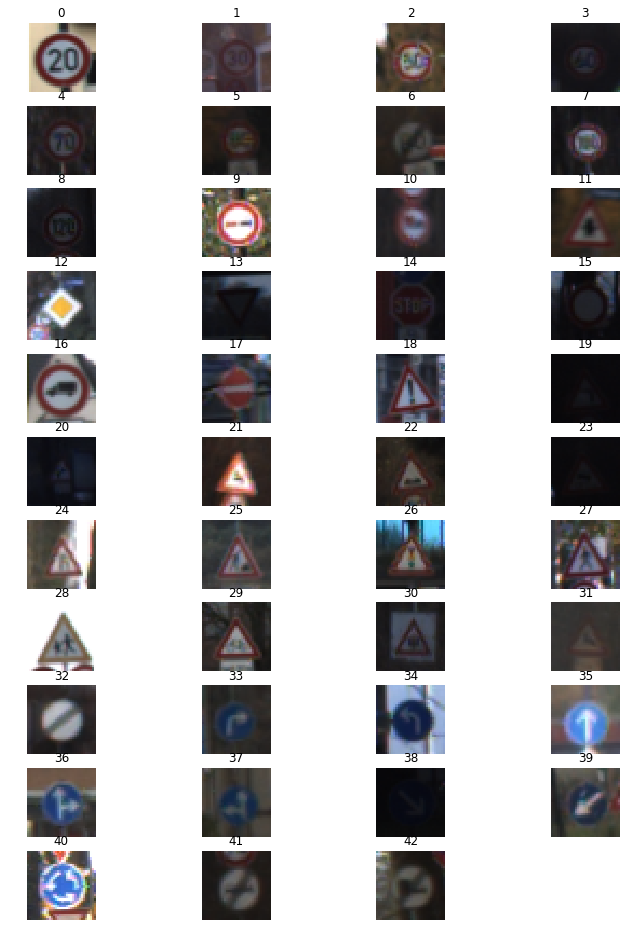

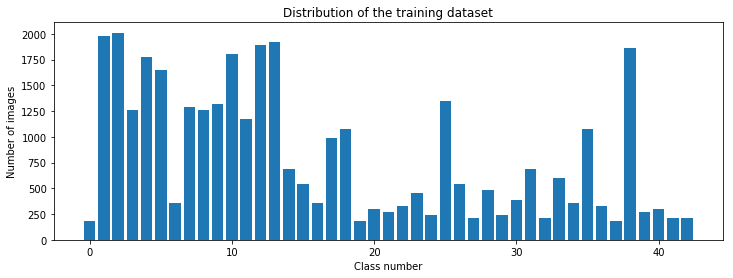

Min number of images per class = 180
Max number of images per class = 2010


In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline


num_of_samples=[]
plt.figure(figsize=(12, 16.5))
for i in range(0, n_classes):
    plt.subplot(11, 4, i+1)
    x_selected = X_train[y_train == i]
    plt.imshow(x_selected[0, :, :, :]) #draw the first image of each class
    plt.title(i)
    plt.axis('off')
    num_of_samples.append(len(x_selected))
plt.show()

#Plot number of images per class
plt.figure(figsize=(12, 4))
plt.bar(range(0, n_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

print("Min number of images per class =", min(num_of_samples))
print("Max number of images per class =", max(num_of_samples))

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.


### Step 2.1 Data Augmentation
Exisiting training set is too small. Also, traning set data is highly unbalanced. min to max ratio of number of samples per class it almost 9. In below step,  more trianing data is generated by rotating, blurring the existing images. 

In [4]:
### Define some useful image processing fuctions which will be used in pre_processing and data augmentation
    
#Histogram Equalization   
def eq_Hist(img):
    img[:, :, 0] = cv2.equalizeHist(img[:, :, 0])
    img[:, :, 1] = cv2.equalizeHist(img[:, :, 1])
    img[:, :, 2] = cv2.equalizeHist(img[:, :, 2])
    return img

#Normalization function to avoid local minima
def normalize_img(img):
    return cv2.normalize(image, zeros, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

#Function to rotate image 
def rotate_img(img,angle):
    return scipy.ndimage.rotate(img, angle, reshape=False)
    
#Function to sharpen the image (i.e increase the contrast)  
def sharpen_img(img):
    gb = cv2.GaussianBlur(img, (5,5), 20.0)
    return cv2.addWeighted(img, 2, gb, -1, 0)

#Apply random brightness on an image
def bright_img(img):
    img = cv2.cvtColor(img,cv2.COLOR_RGB2HSV)
    br = 0.3+np.random.uniform()
    if br > 1.0:
        br = 1.0
    img[:,:,2] = img[:,:,2]*br
    img = cv2.cvtColor(img,cv2.COLOR_HSV2RGB)
    return img

In [5]:
### Do Data Augmentation to generate many more samples
# Generate additional data for underrepresented classes
print('Generating additional data from training set.')

### Generate multiple images by rotating with different angles
### Larger angles such as 90 degress are not choosen because they result in different sign
angles = [-5, 5, -8, 8,-11,11,-15,15,-3,3,-13,13]

new_images = []
new_labels = []

### Analysis in step3 shows that dataset is highly unbalanced
### Below algorythm tries to balance the dataset.
for i in range(len(inputs_per_class)):
    input_ratio = min(int(max_inputs / inputs_per_class[i]) - 1, len(angles) - 1)
    
    if input_ratio <= 1:
        continue

    mask = np.where(y_train == i)

    for j in range(input_ratio):
        for img in X_train[mask]:
            new_images.append(rotate_img(img, angles[j]))           
            new_labels.append(i)
    
# Also add a image with modified brightness level for every image
for i in range(len(X_train)):
    img_output =  bright_img(X_train[i])    
    new_images.append(img_output)
    new_labels.append(y_train[i])

### Add the newly added images
X_train = np.append(X_train, new_images, axis=0)
y_train = np.append(y_train, new_labels, axis=0)

### Sanity checks    
assert(len(X_train) == len(y_train))

n_train = len(X_train)

inputs_per_class = np.bincount(y_train)
max_inputs = np.max(inputs_per_class)

print ("Data augmentation complete ")
print("Number of training examples after data augmentation =", n_train)
print("number of training samples per class =", inputs_per_class)
print("Max Number of training sample in a class =", max_inputs)


Generating additional data from training set.
Data augmentation complete 
Number of training examples after data augmentation = 106646
number of training samples per class = [2160 3960 4020 2520 3540 3300 2160 2580 2520 2640 3600 2340 3780 3840 1380
 2160 2160 1980 2160 2160 2100 2160 2310 2250 2160 2700 2160 2100 2400 2160
 2340 1380 2100 2396 2160 2160 2310 2160 3720 2160 2100 2100 2100]
Max Number of training sample in a class = 4020


### Step2.2 Pre-process the Data Set (normalization, grayscale, etc.)

In pre-processing, histogram augmentation is done followed by normalization. Image data should be normalized so that the data has mean zero and equal variance. This would help with the gradient descent algorigthm. 

In [6]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
### Pre-processing the Images now
### Perform histogram augmentatio and then normalization

def pre_processing(img_list):
    
    count = len(img_list)
    shape = img_list[0].shape
    processed = []
    zeros = np.zeros((32,32,3))
    
    for i in range(count):
        img = eq_Hist(img_list[i])
        norm_image = cv2.normalize(img, zeros, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)      
        processed.append(norm_image)
    
    return np.reshape(np.array(processed), [count, shape[0], shape[1], 3])


X_train = pre_processing(X_train)
X_valid = pre_processing(X_valid)
X_test = pre_processing(X_test)


print("\nPreprocessing of images complete..\n")
print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)
print("number of training samples per class =", inputs_per_class)
print("Max Number of training sample in a class =", max_inputs)

# Shuffle the data
X_train, y_train = shuffle(X_train, y_train)
X_test, y_test = shuffle(X_test, y_test)
X_valid, y_valid = shuffle(X_valid, y_valid)


Preprocessing of images complete..

Number of training examples = 106646
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43
number of training samples per class = [2160 3960 4020 2520 3540 3300 2160 2580 2520 2640 3600 2340 3780 3840 1380
 2160 2160 1980 2160 2160 2100 2160 2310 2250 2160 2700 2160 2100 2400 2160
 2340 1380 2100 2396 2160 2160 2310 2160 3720 2160 2100 2100 2100]
Max Number of training sample in a class = 4020


## Step3 Model Architecture

In [7]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

## Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf
from tensorflow.contrib.layers import flatten

EPOCHS = 30
BATCH_SIZE = 128
rate = 0.001


def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)
       
    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

     # SOLUTION: Add Dropout
    conv1 = tf.nn.dropout(conv1, keep_prob_conv)  
    
    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Add Dropout
    conv2 = tf.nn.dropout(conv2, keep_prob_conv)

    
    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Add Dropout
    fc1 = tf.nn.dropout(fc1, keep_prob)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Add Dropout
    fc2 = tf.nn.dropout(fc2, keep_prob)
        
    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

## Features and Labels


In [8]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
keep_prob_conv = tf.placeholder(tf.float32)
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)

## Training Pipeline


In [9]:

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

## Model Evaluation


In [10]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:1, keep_prob_conv:1})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [11]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y,keep_prob:0.7, keep_prob_conv:0.7})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.836

EPOCH 2 ...
Validation Accuracy = 0.903

EPOCH 3 ...
Validation Accuracy = 0.930

EPOCH 4 ...
Validation Accuracy = 0.950

EPOCH 5 ...
Validation Accuracy = 0.949

EPOCH 6 ...
Validation Accuracy = 0.956

EPOCH 7 ...
Validation Accuracy = 0.955

EPOCH 8 ...
Validation Accuracy = 0.962

EPOCH 9 ...
Validation Accuracy = 0.965

EPOCH 10 ...
Validation Accuracy = 0.961

EPOCH 11 ...
Validation Accuracy = 0.965

EPOCH 12 ...
Validation Accuracy = 0.964

EPOCH 13 ...
Validation Accuracy = 0.961

EPOCH 14 ...
Validation Accuracy = 0.963

EPOCH 15 ...
Validation Accuracy = 0.963

EPOCH 16 ...
Validation Accuracy = 0.961

EPOCH 17 ...
Validation Accuracy = 0.963

EPOCH 18 ...
Validation Accuracy = 0.970

EPOCH 19 ...
Validation Accuracy = 0.955

EPOCH 20 ...
Validation Accuracy = 0.969

EPOCH 21 ...
Validation Accuracy = 0.971

EPOCH 22 ...
Validation Accuracy = 0.968

EPOCH 23 ...
Validation Accuracy = 0.969

EPOCH 24 ...
Validation Accura

##Step3.1 Run the model on test set

In [12]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.943


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

In [13]:
### Creating Label Dictionary
import csv

label_dict = None
with open('signnames.csv', mode='r') as infile:
    reader = csv.reader(infile)
    next(reader, None)
    label_dict = {int(rows[0]):rows[1] for rows in reader}


### Load and Output the Images


C:\ProgramData\Miniconda3\envs\carnd-term1\lib\site-packages\matplotlib\figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


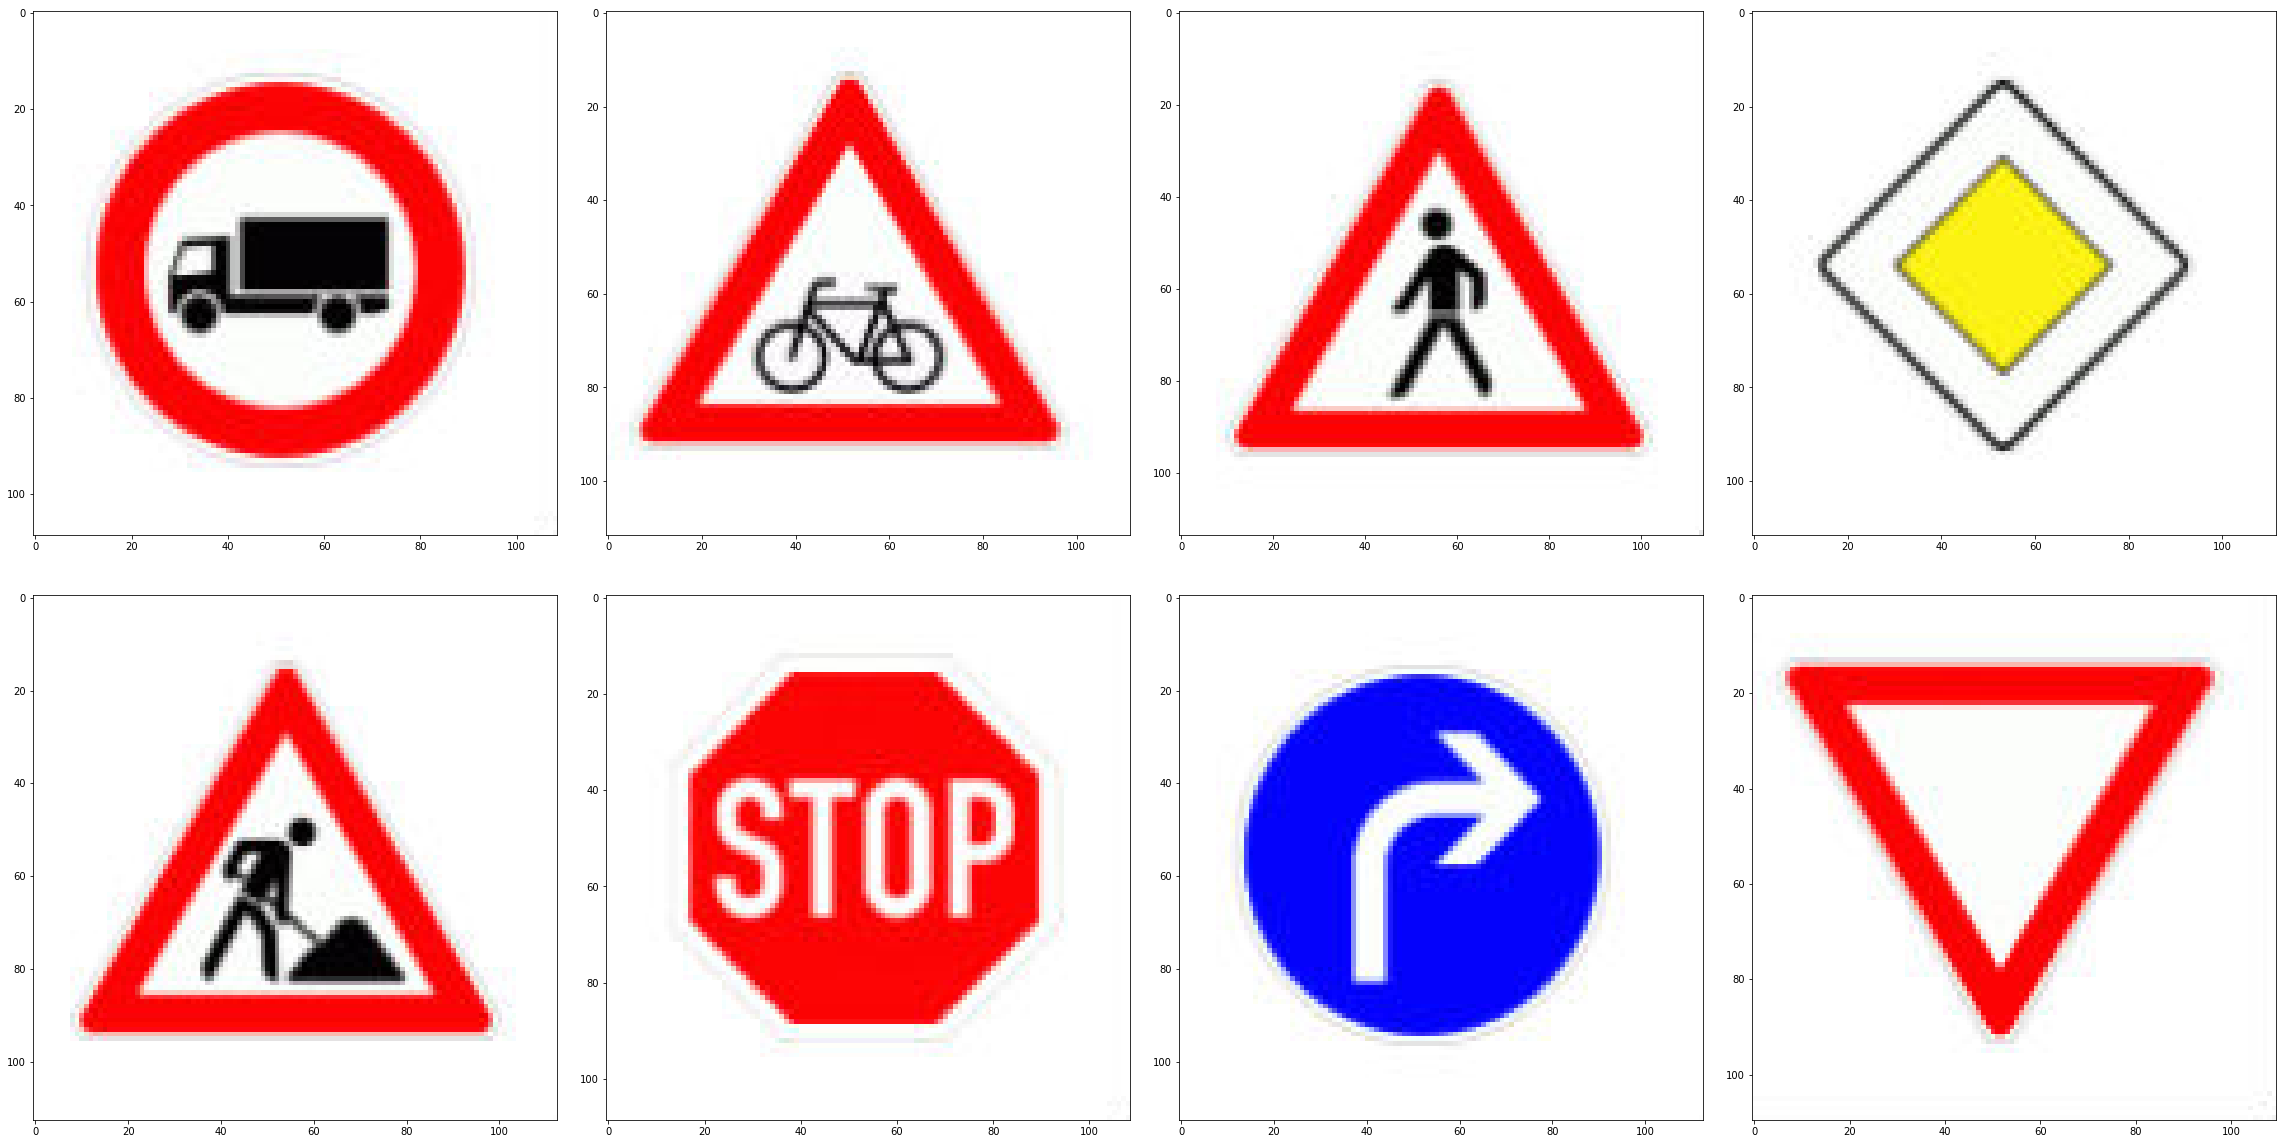

raw image list : ['web_data/1.jpg', 'web_data/2.jpg', 'web_data/3.jpg', 'web_data/4.jpg', 'web_data/5.jpg', 'web_data/6.jpg', 'web_data/7.jpg', 'web_data/8.jpg']


In [14]:
### Load the images and plot them here.
### sample images are downloaded from the internet and stored in data folder.

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

#Global list of raw test images
my_raw_images = []

import os
fig = plt.figure(figsize=(32,32), tight_layout={'h_pad':4})
i = 0
for file in os.listdir('web_data'):
    if '.jpg' in file:
        my_raw_images.append('web_data/' + file)
        ax = fig.add_subplot(4,4,i+1) 
        img = mpimg.imread('web_data/' + file)
        ax.imshow(img)
        i+=1
plt.show()
print ("raw image list : {}".format(my_raw_images))

### Predict the Sign Type for Each Image

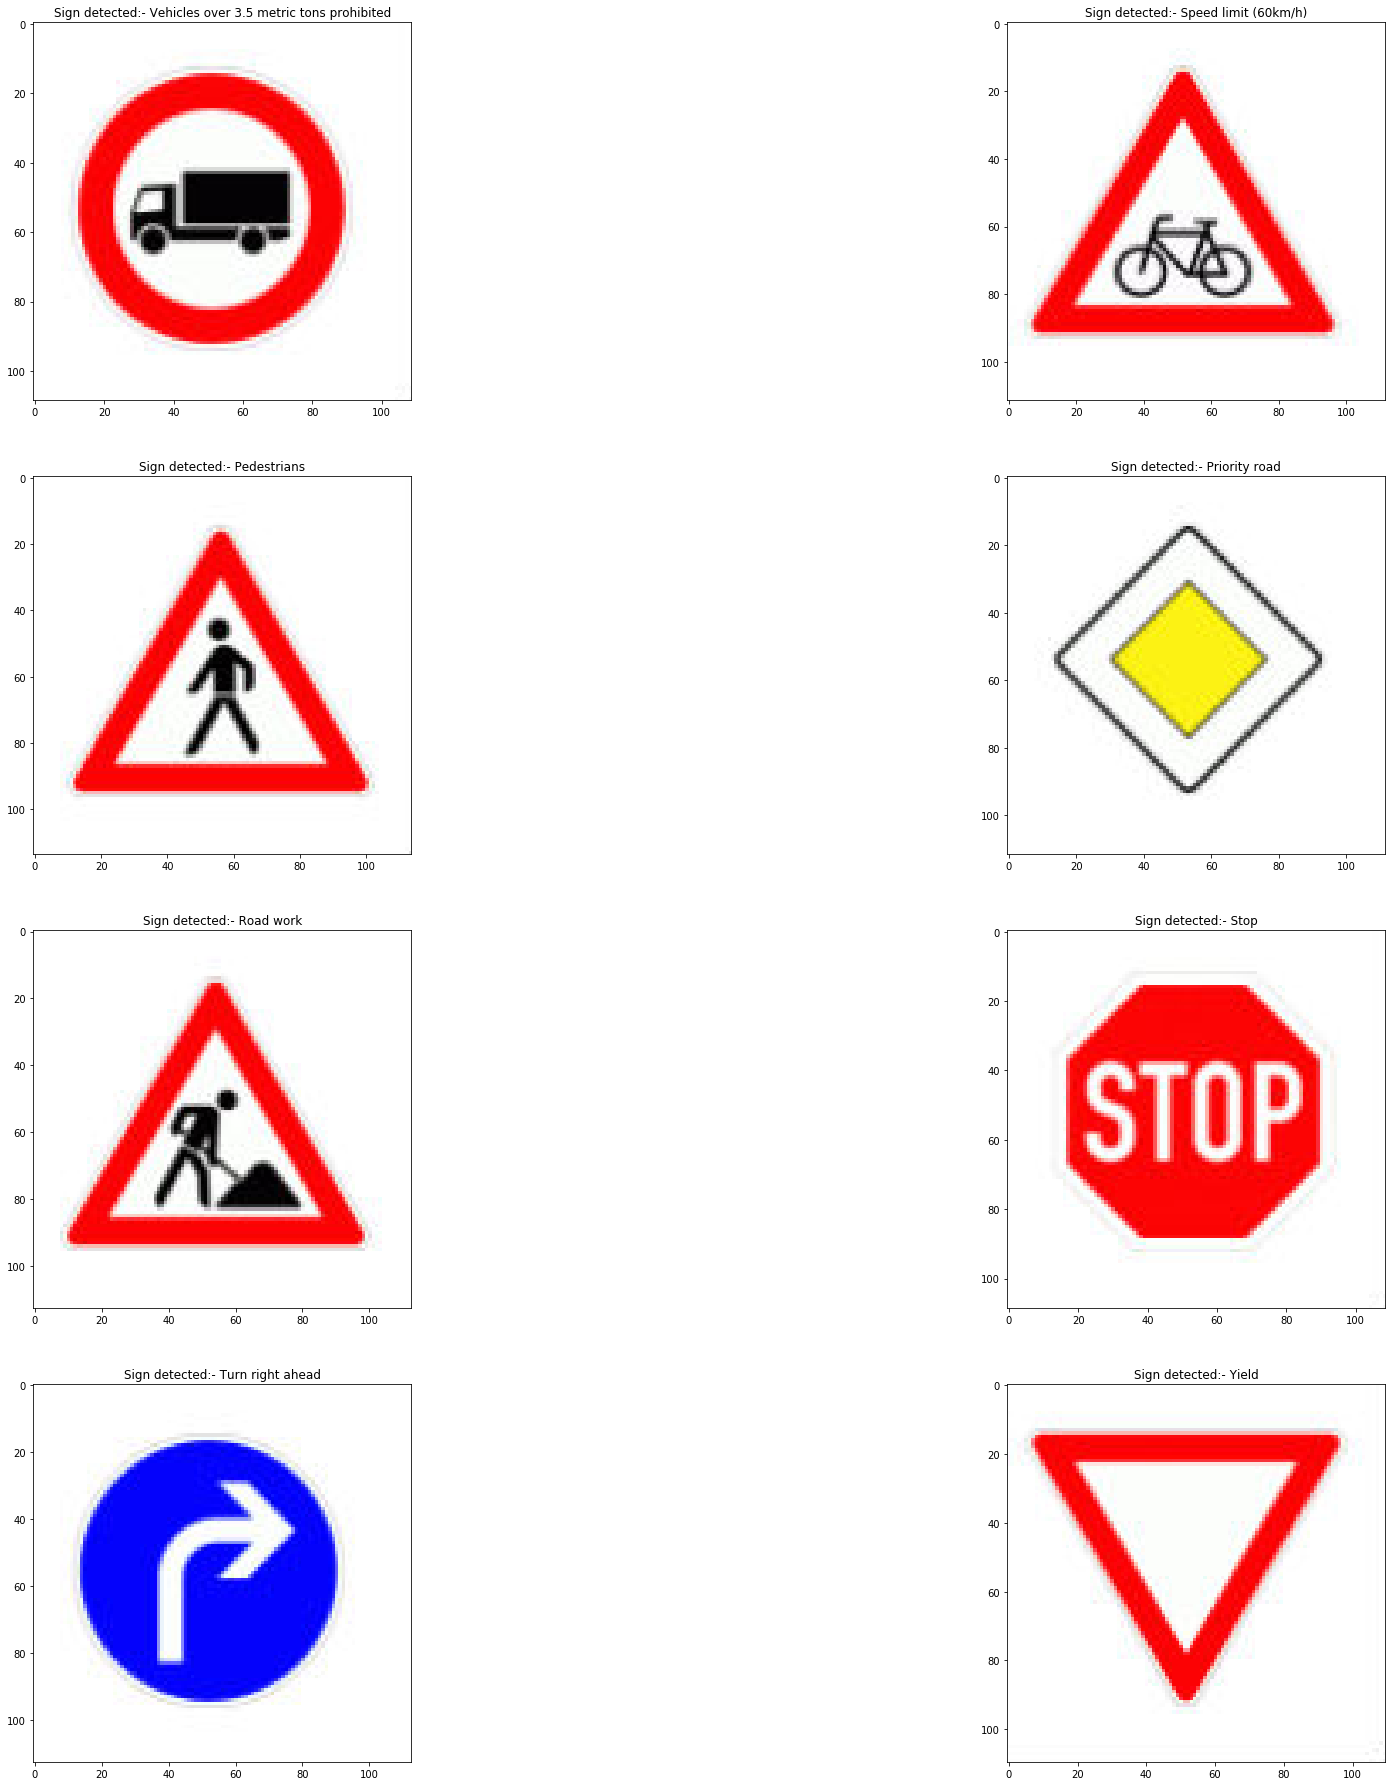

In [15]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

import os, sys
from PIL import Image
import warnings

size = 32, 32
logit = None
my_images = []

#Convert the imaes into thumbnail images 
for i in range(0,len(my_raw_images)):
    img = Image.open(my_raw_images[i])
    img.thumbnail(size, Image.ANTIALIAS)
    my_images.append(np.array(img))
            
my_images_preprocessed = pre_processing(np.array(my_images))

#Run the neural network on it
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    logit = sess.run(tf.argmax(logits, 1), feed_dict={x:my_images_preprocessed, keep_prob:1.0, keep_prob_conv:1})

    
# Plot the images and sign detected along with it
fig = plt.figure(figsize=(32,32))

for i in range(0,len(my_images)):
    ax = fig.add_subplot(4,2,i+1) 
    ax.imshow(mpimg.imread(my_raw_images[i]))
    ax.set_title("Sign detected:- {}".format(label_dict[logit[i]]))
plt.show()
    


### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

print (" All 8 test images were sucessfully detected. Test accuracy = 100% ")

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

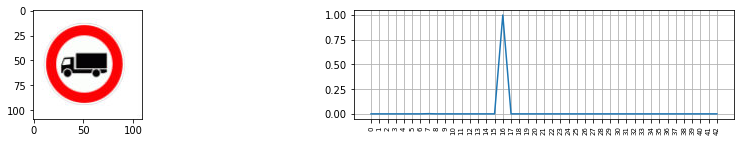

 Top 5 probabilities predicted by softmax algoritm along with their values
 Index number: 0 , Probability value: 0.9977023005485535, Sign label index : 16
 Index number: 1 , Probability value: 0.0019752460066229105, Sign label index : 7
 Index number: 2 , Probability value: 0.00019305653404444456, Sign label index : 9
 Index number: 3 , Probability value: 8.244316268246621e-05, Sign label index : 5
 Index number: 4 , Probability value: 2.7710313588613644e-05, Sign label index : 8


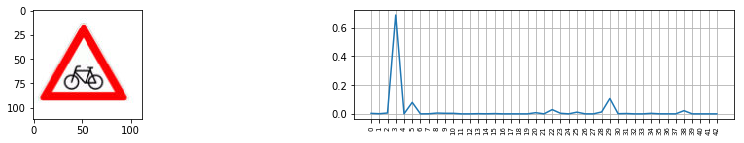

 Top 5 probabilities predicted by softmax algoritm along with their values
 Index number: 0 , Probability value: 0.6874043345451355, Sign label index : 3
 Index number: 1 , Probability value: 0.10716386139392853, Sign label index : 29
 Index number: 2 , Probability value: 0.08015187084674835, Sign label index : 5
 Index number: 3 , Probability value: 0.029604023322463036, Sign label index : 22
 Index number: 4 , Probability value: 0.022121185436844826, Sign label index : 38


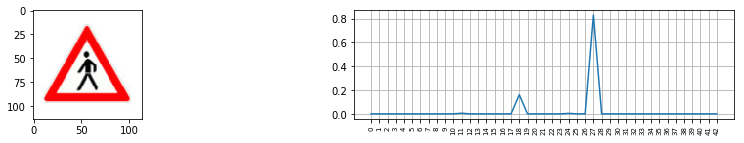

 Top 5 probabilities predicted by softmax algoritm along with their values
 Index number: 0 , Probability value: 0.8299410343170166, Sign label index : 27
 Index number: 1 , Probability value: 0.16052211821079254, Sign label index : 18
 Index number: 2 , Probability value: 0.005286495666950941, Sign label index : 11
 Index number: 3 , Probability value: 0.004067474976181984, Sign label index : 24
 Index number: 4 , Probability value: 0.00012029030040139332, Sign label index : 28


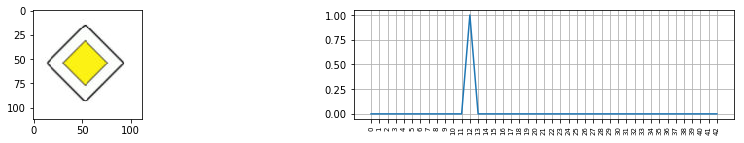

 Top 5 probabilities predicted by softmax algoritm along with their values
 Index number: 0 , Probability value: 0.9998452663421631, Sign label index : 12
 Index number: 1 , Probability value: 7.035648013697937e-05, Sign label index : 13
 Index number: 2 , Probability value: 4.9918864533538e-05, Sign label index : 10
 Index number: 3 , Probability value: 1.0065809874504339e-05, Sign label index : 17
 Index number: 4 , Probability value: 4.00716089643538e-06, Sign label index : 5


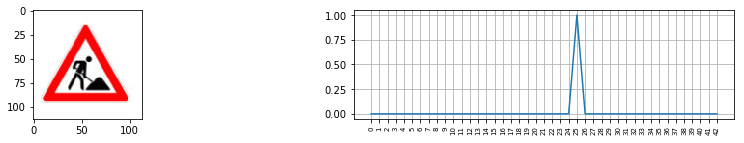

 Top 5 probabilities predicted by softmax algoritm along with their values
 Index number: 0 , Probability value: 0.9999734163284302, Sign label index : 25
 Index number: 1 , Probability value: 7.514418939535972e-06, Sign label index : 31
 Index number: 2 , Probability value: 4.634826836991124e-06, Sign label index : 5
 Index number: 3 , Probability value: 4.385459305922268e-06, Sign label index : 30
 Index number: 4 , Probability value: 3.8253133425314445e-06, Sign label index : 20


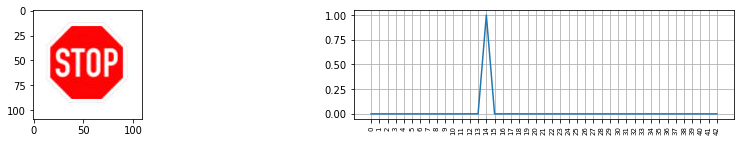

 Top 5 probabilities predicted by softmax algoritm along with their values
 Index number: 0 , Probability value: 0.9985758066177368, Sign label index : 14
 Index number: 1 , Probability value: 0.00040239302325062454, Sign label index : 12
 Index number: 2 , Probability value: 0.00038515363121405244, Sign label index : 17
 Index number: 3 , Probability value: 0.0003402652801014483, Sign label index : 13
 Index number: 4 , Probability value: 0.00014899863163009286, Sign label index : 34


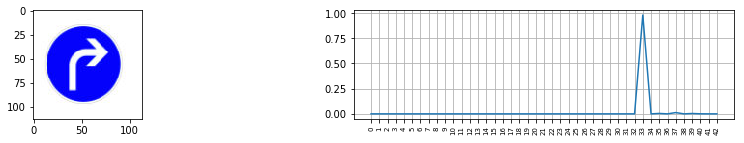

 Top 5 probabilities predicted by softmax algoritm along with their values
 Index number: 0 , Probability value: 0.9791160225868225, Sign label index : 33
 Index number: 1 , Probability value: 0.012669154442846775, Sign label index : 37
 Index number: 2 , Probability value: 0.004086029715836048, Sign label index : 35
 Index number: 3 , Probability value: 0.003560667624697089, Sign label index : 39
 Index number: 4 , Probability value: 0.0005167543422430754, Sign label index : 40


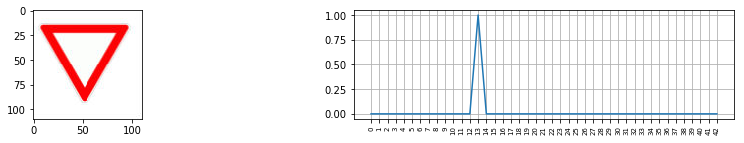

 Top 5 probabilities predicted by softmax algoritm along with their values
 Index number: 0 , Probability value: 0.999711811542511, Sign label index : 13
 Index number: 1 , Probability value: 0.0001898791961139068, Sign label index : 34
 Index number: 2 , Probability value: 3.0048810003791004e-05, Sign label index : 12
 Index number: 3 , Probability value: 2.407706415397115e-05, Sign label index : 38
 Index number: 4 , Probability value: 2.3784306904417463e-05, Sign label index : 9


In [16]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

import os, sys
from PIL import Image
import warnings
import pandas as pd

size = 32, 32
softmax_prob = None

# function to compute top 5 probabilities
softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k=5)

#Run the neural network on test data and compute top 5 probabilities for each sign
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    softmax_prob = sess.run(tf.nn.softmax(logits), feed_dict={x:my_images_preprocessed, keep_prob:1.0, keep_prob_conv:1})
    my_top_5 = sess.run(top_k, feed_dict={x:my_images_preprocessed, keep_prob:1.0, keep_prob_conv:1})


# Plot the images and top 5 probabilities
for i in range(0,len(my_images)):
    fig = plt.figure(figsize=(15,2))
    ax = fig.add_subplot(1,2,1) 
    ax.imshow(mpimg.imread(my_raw_images[i]))
    ax = fig.add_subplot(1,2,2) 
    ax.set_xticks(np.arange(0,43,1))
    plt.plot(softmax_prob[i])    
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize('x-small') 
        tick.label.set_rotation('vertical')
    plt.grid()
    plt.show()
    
    print (" Top 5 probabilities predicted by softmax algoritm along with their values")
    for j in range(0,5):
        print (" Index number: {} , Probability value: {}, Sign label index : {}".format(j,my_top_5[0][i][j],my_top_5[1][i][j]))


            
    

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.